Mounting Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp '/content/drive/My Drive/Anon 17/Set 1/L1 Set1.csv' .
!cp '/content/drive/My Drive/Anon 17/Set 1/L2 Set1.csv' .
!cp '/content/drive/My Drive/Anon 17/Set 1/L3 Set1.csv' .

In [3]:
!cp '/content/drive/My Drive/Anon 17/Set 4/Set 4 L1.arff' .
!cp '/content/drive/My Drive/Anon 17/Set 4/Set 4 L2.arff' .
!cp '/content/drive/My Drive/Anon 17/Set 4/Set 4 L3.arff' .

Installing Java

In [1]:
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

openjdk version "11.0.9.1" 2020-11-04
OpenJDK Runtime Environment (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04)
OpenJDK 64-Bit Server VM (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)


Installing Weka and its Python Wrapper

In [2]:
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install python-weka-wrapper3

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
proj-bin is already the newest version (4.9.3-2).
proj-data is already the newest version (4.9.3-2).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


Testing if Python Weka works

In [3]:
import weka.core.jvm as jvm
jvm.start(packages=True,max_heap_size="25G")

from weka.core.converters import Loader
from weka.core.classes import Random
from weka.classifiers import Classifier, Evaluation

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/usr/local/lib/python3.6/dist-packages/javabridge/jars/rhino-1.7R4.jar', '/usr/local/lib/python3.6/dist-packages/javabridge/jars/runnablequeue.jar', '/usr/local/lib/python3.6/dist-packages/javabridge/jars/cpython.jar', '/usr/local/lib/python3.6/dist-packages/weka/lib/weka.jar', '/usr/local/lib/python3.6/dist-packages/weka/lib/python-weka-wrapper.jar']
DEBUG:weka.core.jvm:MaxHeapSize=25G
DEBUG:weka.core.jvm:Package support enabled


Importing Libraries

In [4]:
from weka.attribute_selection import ASSearch, ASEvaluation, AttributeSelection

from weka.filters import Filter


from weka.classifiers import Evaluation
from weka.core.classes import Random
import seaborn as sns
import numpy as np

from matplotlib.colors import LogNorm
import matplotlib.colors as colors

from weka.classifiers import Evaluation
from weka.core.classes import Random

Loading Datasets for Flow based TC

In [5]:
loader = Loader(classname="weka.core.converters.CSVLoader")
data_file1 = 'L1 Set1.csv'
data_file2 = 'L2 Set1.csv'
data_file3 = 'L3 Set1.csv'
data1 = loader.load_file(data_file1)
data2 = loader.load_file(data_file2)
data3 = loader.load_file(data_file3)

Loading Datasets for Early TC

In [6]:
loader1=Loader(classname='weka.core.converters.ArffLoader')
e_data_file1 = 'Set 4 L1.arff'
e_data_file2 = 'Set 4 L2.arff'
e_data_file3 = 'Set 4 L3.arff'
e_data1 = loader1.load_file(e_data_file1)
e_data2 = loader1.load_file(e_data_file2)
e_data3 = loader1.load_file(e_data_file3)

Feature Selection

In [10]:
def PearsonCorr(data):
  search = ASSearch(classname="weka.attributeSelection.Ranker", options=["-T"," -1.7976931348623157E308", "-N", "-1"])
  evaluator = ASEvaluation(classname="weka.attributeSelection.CorrelationAttributeEval")
  attsel = AttributeSelection()
  attsel.search(search)
  attsel.ranking(True)
  attsel.evaluator(evaluator)
  data.class_index=1
  attsel.select_attributes(data)

#  print("# attributes: " + str(attsel.number_attributes_selected))
#  print("attributes: " + str(attsel.selected_attributes))
#  print("result string:\n" + attsel.results_string)
  full_result= str(attsel.selected_attributes)

#To parse required characters
  full_result=full_result.replace("[","")
  full_result=full_result.replace("]","")
  full_result=full_result.replace("\n","")


#Converting str to list and removing empty elements
  full_result = list(full_result.split(" "))
  full_result=list(filter(lambda a: a !='', full_result))

#Converting list elements from str to int
  full_result = list(map(int, full_result)) 


#Adding 1 to all elements to match weka's indexing format
  full_result = list(map(lambda x : x + 1, full_result))   
  class_ind_weka_format=full_result[-1]


  full_result.remove(class_ind_weka_format)    
  print("List in weka index format: ",full_result)

  return full_result,class_ind_weka_format


Feature Extraction

In [11]:
def extract_no_of_features(l1,class_ind_weka_format,data):
  l1.append(class_ind_weka_format)
#Converting list to str
  l1=(list(map(str,l1)))
  l1= ','.join(l1)

#Copy of original data
  Cdata=data
  reordered = Filter(classname='weka.filters.unsupervised.attribute.Reorder',options=["-R",l1])
  reordered.inputformat(Cdata)
  reordered=reordered.filter(Cdata)
  #print(reordered)
  return reordered



Best-flow based classifier for L1 (Random forest 74 features )

List in weka index format:  [4, 46, 33, 41, 38, 32, 31, 40, 74, 59, 58, 39, 10, 71, 9, 16, 34, 64, 42, 60, 52, 56, 49, 67, 75, 70, 66, 68, 65, 17, 55, 47, 11, 44, 18, 45, 48, 63, 22, 61, 53, 19, 14, 54, 51, 25, 72, 57, 50, 69, 6, 43, 28, 5, 15, 73, 36, 37, 35, 8, 7, 1, 21, 3, 29, 12, 13, 62, 26, 20, 27, 30, 24, 23]
NUMBER OF FEATURES: 74
For the classifier weka.classifiers.trees.RandomForest
Accuracy:  99.85642116458389
F-Measure:  0.9986843432983074

Correctly Classified Instances       56334               99.8564 %
Incorrectly Classified Instances        81                0.1436 %
Kappa statistic                          0.9975
Mean absolute error                      0.0065
Root mean squared error                  0.0369
Relative absolute error                  1.6811 %
Root relative squared error              8.3786 %
Total Number of Instances            56415     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Ar

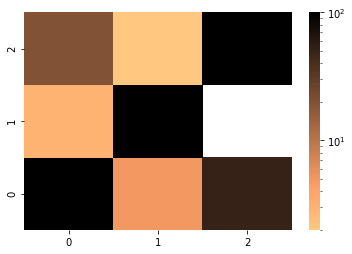

In [ ]:
classifiers=["weka.classifiers.bayes.NaiveBayes","weka.classifiers.bayes.BayesNet","weka.classifiers.trees.J48","weka.classifiers.trees.RandomForest"]
parameters=[["-D"],["-D","-Q","weka.classifiers.bayes.net.search.local.TAN"],["-U"],[""]]

def MLClassifier(choice,data,no_features):
  cls = Classifier(classname=classifiers[choice-1],options=parameters[choice-1])
  data.class_index=no_features-1
  evl = Evaluation(data1)
  evl.crossvalidate_model(cls, data1, 10, Random(1))


  print('For the classifier '+classifiers[choice-1])
  print("Accuracy: ",evl.percent_correct)
  print("F-Measure: ",evl.unweighted_macro_f_measure)
  print(evl.summary())
  print(evl.class_details())
  print(evl.matrix())


  sns.color_palette("YlOrBr", as_cmap=True,n_colors=256)
  uniform_data = np.transpose(evl.confusion_matrix)
  ax = sns.heatmap(uniform_data,norm=LogNorm(vmax=100),cmap='copper_r',vmax=100)
  ax.invert_yaxis()
  print("\n")
if __name__=="__main__":
  full_ranked_attr,class_ind_weka_format=PearsonCorr(data1)
  temp=[]
  for k in range(0,74):
      temp.append(full_ranked_attr[k])
  Temp_dataset=extract_no_of_features(temp,class_ind_weka_format,data1)
  #print("Attr list",temp)
  print("NUMBER OF FEATURES:",len(temp)-1)  
  MLClassifier(4,Temp_dataset,len(temp))

Best-flow based classifier for L2 (C4.5 with 70 features) NEW

List in weka index format:  [46, 4, 41, 33, 32, 38, 31, 40, 74, 59, 58, 39, 10, 34, 51, 9, 50, 71, 16, 64, 67, 68, 42, 70, 65, 52, 66, 60, 75, 49, 56, 17, 55, 11, 69, 73, 44, 22, 63, 72, 47, 48, 45, 18, 61, 54, 53, 19, 57, 14, 43, 25, 15, 35, 6, 28, 37, 36, 5, 8, 1, 21, 7, 3, 62, 27, 20, 29, 12, 26, 13, 30, 23, 24]
NUMBER OF FEATURES: 70
For the classifier weka.classifiers.trees.J48
Accuracy:  96.58246920145352
F-Measure:  0.9401132984757513

Correctly Classified Instances       54487               96.5825 %
Incorrectly Classified Instances      1928                3.4175 %
Kappa statistic                          0.9546
Mean absolute error                      0.0115
Root mean squared error                  0.0932
Relative absolute error                  5.3572 %
Root relative squared error             28.4148 %
Total Number of Instances            56415     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC A

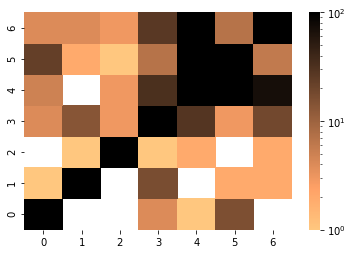

In [13]:
classifiers=["weka.classifiers.bayes.NaiveBayes","weka.classifiers.bayes.BayesNet","weka.classifiers.trees.J48","weka.classifiers.trees.RandomForest"]
parameters=[["-D"],["-D","-Q","weka.classifiers.bayes.net.search.local.TAN"],["-U"],[""]]

def MLClassifier(choice,data,no_features):
  cls = Classifier(classname=classifiers[choice-1],options=parameters[choice-1])
  data.class_index=no_features-1
  evl = Evaluation(data2)
  evl.crossvalidate_model(cls, data2, 10, Random(1))


  print('For the classifier '+classifiers[choice-1])
  print("Accuracy: ",evl.percent_correct)
  print("F-Measure: ",evl.unweighted_macro_f_measure)
  print(evl.summary())
  print(evl.class_details())
  print(evl.matrix())


  sns.color_palette("YlOrBr", as_cmap=True,n_colors=256)
  uniform_data = evl.confusion_matrix
  ax = sns.heatmap(uniform_data,norm=LogNorm(vmax=100),cmap='copper_r',vmax=100)
  ax.invert_yaxis()
  print("\n")
if __name__=="__main__":
  full_ranked_attr,class_ind_weka_format=PearsonCorr(data2)
  temp=[]
  for k in range(0,70):
      temp.append(full_ranked_attr[k])
  Temp_dataset=extract_no_of_features(temp,class_ind_weka_format,data2)
  #print("Attr list",temp)
  print("NUMBER OF FEATURES:",len(temp)-1)  
  MLClassifier(3,Temp_dataset,len(temp))


Best-flow based classifier for L3 (RF with 30 features)

List in weka index format:  [4, 46, 33, 41, 38, 32, 59, 40, 58, 10, 31, 39, 74, 68, 60, 56, 71, 73, 51, 42, 50, 69, 55, 9, 64, 16, 34, 52, 11, 67, 70, 65, 49, 17, 66, 72, 75, 57, 54, 18, 22, 47, 44, 53, 19, 45, 48, 63, 61, 14, 25, 43, 35, 6, 8, 28, 5, 15, 37, 36, 7, 21, 1, 3, 62, 27, 29, 12, 26, 20, 13, 30, 24, 23]
NUMBER OF FEATURES: 30
For the classifier weka.classifiers.trees.RandomForest
Accuracy:  74.09731454400425
F-Measure:  0.6900491592584951

Correctly Classified Instances       41802               74.0973 %
Incorrectly Classified Instances     14613               25.9027 %
Kappa statistic                          0.712 
Mean absolute error                      0.0308
Root mean squared error                  0.1234
Relative absolute error                 35.9444 %
Root relative squared error             59.5592 %
Total Number of Instances            56415     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Ar

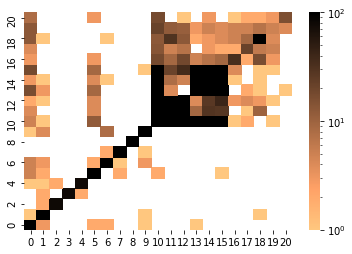

In [ ]:
classifiers=["weka.classifiers.bayes.NaiveBayes","weka.classifiers.bayes.BayesNet","weka.classifiers.trees.J48","weka.classifiers.trees.RandomForest"]
parameters=[["-D"],["-D","-Q","weka.classifiers.bayes.net.search.local.TAN"],["-U"],[""]]

def MLClassifier(choice,data,no_features):
  cls = Classifier(classname=classifiers[choice-1],options=parameters[choice-1])
  data.class_index=no_features-1
  evl = Evaluation(data3)
  evl.crossvalidate_model(cls, data3, 10, Random(1))


  print('For the classifier '+classifiers[choice-1])
  print("Accuracy: ",evl.percent_correct)
  print("F-Measure: ",evl.unweighted_macro_f_measure)
  print(evl.summary())
  print(evl.class_details())
  print(evl.matrix())


  sns.color_palette("YlOrBr", as_cmap=True,n_colors=256)
  uniform_data = evl.confusion_matrix
  ax = sns.heatmap(uniform_data,norm=LogNorm(vmax=100),cmap='copper_r',vmax=100)
  ax.invert_yaxis()
  print("\n")
if __name__=="__main__":
  full_ranked_attr,class_ind_weka_format=PearsonCorr(data3)
  temp=[]
  for k in range(0,30):
      temp.append(full_ranked_attr[k])
  Temp_dataset=extract_no_of_features(temp,class_ind_weka_format,data3)
  #print("Attr list",temp)
  print("NUMBER OF FEATURES:",len(temp)-1)  
  MLClassifier(4,Temp_dataset,len(temp))
  

Early TC


In [7]:
from weka.filters import Filter
def extract_no_of_packets(n,data):
  l1=[]
  for i in range(1,n+1):
    l1.append(i)
    l1.append(20+i)
  l1.append(41)
#Converting list to str
  l1=(list(map(str,l1)))
  l1= ','.join(l1)

#Copy of original data
  Cdata=data
  reordered = Filter(classname='weka.filters.unsupervised.attribute.Reorder',options=["-R",l1])
  reordered.inputformat(Cdata)
  reordered=reordered.filter(Cdata)
  print(reordered.attribute_names())
  return reordered


Naive Bayes SD with 12 packets

['pl_1', 'iat_1', 'pl_2', 'iat_2', 'pl_3', 'iat_3', 'pl_4', 'iat_4', 'pl_5', 'iat_5', 'pl_6', 'iat_6', 'pl_7', 'iat_7', 'pl_8', 'iat_8', 'pl_9', 'iat_9', 'pl_10', 'iat_10', 'pl_11', 'iat_11', 'TrafficType']
NUMBER OF PACKETS: 11
For the classifier weka.classifiers.bayes.NaiveBayes
Accuracy:  99.63308281338627
F-Measure:  0.9957852268281743


=== Confusion Matrix ===

     a     b     c   <-- classified as
 29376   119     1 |     a = I2P
    21 20542    50 |     b = Tor
     5    11  6291 |     c = JonDonym





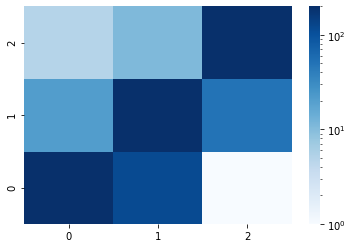

In [ ]:
classifiers=["weka.classifiers.bayes.NaiveBayes","weka.classifiers.bayes.BayesNet","weka.classifiers.trees.J48","weka.classifiers.trees.RandomForest"]
parameters=[["-D"],["-D","-Q","weka.classifiers.bayes.net.search.local.TAN"],["-U"],[""]]
def MLClassifier(choice,data,n):
  cls = Classifier(classname=classifiers[choice-1],options=parameters[choice-1])
  data.class_index=(n*2)

  evl = Evaluation(data)
 
  evl.crossvalidate_model(cls, data, 10, Random(1))
  print('For the classifier '+classifiers[choice-1])
  print("Accuracy: ",evl.percent_correct)
  print("F-Measure: ",evl.unweighted_macro_f_measure)
  print("\n")

  print(evl.matrix())
  sns.color_palette("YlOrBr", as_cmap=True,n_colors=256)
  uniform_data = evl.confusion_matrix
  ax = sns.heatmap(uniform_data,norm=LogNorm(vmax=200),cmap='Blues',vmax=150)
  ax.invert_yaxis()
  print("\n")

if __name__=="__main__":
  no_of_packets=11
  Temp_dataset=extract_no_of_packets(no_of_packets,e_data1)
  #print("Attr list",temp)
  print("NUMBER OF PACKETS:",no_of_packets)  
  MLClassifier(1,Temp_dataset,no_of_packets)

L2 Baysian Networks TAN 16 NEW

['pl_1', 'iat_1', 'pl_2', 'iat_2', 'pl_3', 'iat_3', 'pl_4', 'iat_4', 'pl_5', 'iat_5', 'pl_6', 'iat_6', 'pl_7', 'iat_7', 'pl_8', 'iat_8', 'pl_9', 'iat_9', 'pl_10', 'iat_10', 'pl_11', 'iat_11', 'pl_12', 'iat_12', 'pl_13', 'iat_13', 'pl_14', 'iat_14', 'pl_15', 'iat_15', 'pl_16', 'iat_16', 'TrafficType']
NUMBER OF PACKETS: 16
For the classifier weka.classifiers.bayes.BayesNet
Accuracy:  86.04473908111174
F-Measure:  0.8218727304456067
=== Confusion Matrix ===

     a     b     c     d     e     f     g   <-- classified as
  6836  2686     1     0   104     0     3 |     a = I2P0BW
  4371 14804    10     0   133     0     8 |     b = I2P80BW
    20    11 16183     4     4     0    10 |     c = TorPT
     0     0     1   223     0     1    18 |     d = TorApps
   139   182     3     0   209     0     7 |     e = I2PApps
    14     4     2     1     2  6280     4 |     f = JonDonym
    85     5    15    18     3     4  4008 |     g = Tor







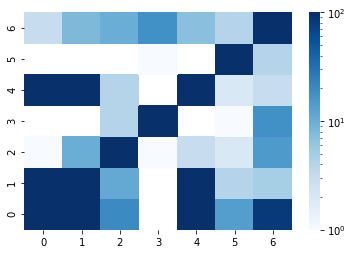

In [8]:
classifiers=["weka.classifiers.bayes.NaiveBayes","weka.classifiers.bayes.BayesNet","weka.classifiers.trees.J48","weka.classifiers.trees.RandomForest"]
parameters=[["-D"],["-D","-Q","weka.classifiers.bayes.net.search.local.TAN"],["-U"],[""]]
def MLClassifier(choice,data,n):
  cls = Classifier(classname=classifiers[choice-1],options=parameters[choice-1])
  data.class_index=(n*2)
 
  evl = Evaluation(data)
  
  evl.crossvalidate_model(cls, data, 10, Random(1))
  print('For the classifier '+classifiers[choice-1])
  print("Accuracy: ",evl.percent_correct)
  print("F-Measure: ",evl.unweighted_macro_f_measure)
  print(evl.matrix())
  print("\n")

  sns.color_palette("YlOrBr", as_cmap=True,n_colors=256)
  uniform_data = np.transpose(evl.confusion_matrix)
  ax = sns.heatmap(uniform_data,norm=LogNorm(vmax=100),cmap='Blues',vmax=100)
  ax.invert_yaxis()
  print("\n")

if __name__=="__main__":
  no_of_packets=16
  Temp_dataset=extract_no_of_packets(no_of_packets,e_data2)
  #print("Attr list",temp)
  print("NUMBER OF PACKETS:",no_of_packets)  
  MLClassifier(2,Temp_dataset,no_of_packets)

L3 BN_TAN 16 NEW

['pl_1', 'iat_1', 'pl_2', 'iat_2', 'pl_3', 'iat_3', 'pl_4', 'iat_4', 'pl_5', 'iat_5', 'pl_6', 'iat_6', 'pl_7', 'iat_7', 'pl_8', 'iat_8', 'pl_9', 'iat_9', 'pl_10', 'iat_10', 'pl_11', 'iat_11', 'pl_12', 'iat_12', 'pl_13', 'iat_13', 'pl_14', 'iat_14', 'pl_15', 'iat_15', 'pl_16', 'iat_16', 'TrafficType']
NUMBER OF PACKETS: 16
For the classifier weka.classifiers.bayes.BayesNet
Accuracy:  67.14407260351673
F-Measure:  0.5246430938801748


=== Confusion Matrix ===

    a    b    c    d    e    f    g    h    i    j    k    l    m    n    o    p    q    r    s    t    u   <-- classified as
 4535  134  136  506  435  529    1    0    0    0    1    0    0    0    2    1    4    0    0    0    2 |    a = I2PSNARK0BW
  444  182  105  187  246  273    1    0    0    0    0    0    0    0    3    1    6    0    0    0    4 |    b = IRC0BW
  859  157  178  169  245  269    1    0    0    0    0    0    0    0    1    0   12    0    0    0    1 |    c = Eepsites0BW
 1650   66   62 1643 1697 1381    1

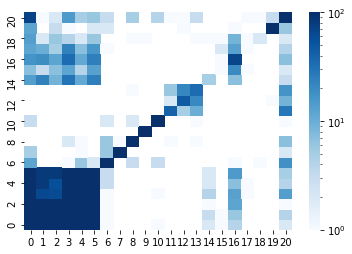

In [14]:
classifiers=["weka.classifiers.bayes.NaiveBayes","weka.classifiers.bayes.BayesNet","weka.classifiers.trees.J48","weka.classifiers.trees.RandomForest"]
parameters=[["-D"],["-D","-Q","weka.classifiers.bayes.net.search.local.TAN"],["-U"],[""]]
def MLClassifier(choice,data,n):
  cls = Classifier(classname=classifiers[choice-1],options=parameters[choice-1])
  data.class_index=(n*2)
 
  evl = Evaluation(data)
  
  evl.crossvalidate_model(cls, data, 10, Random(1))
  print('For the classifier '+classifiers[choice-1])
  print("Accuracy: ",evl.percent_correct)
  print("F-Measure: ",evl.unweighted_macro_f_measure)
  print("\n")
  print(evl.matrix())
  sns.color_palette("YlOrBr", as_cmap=True,n_colors=256)
  uniform_data = evl.confusion_matrix
  ax = sns.heatmap(uniform_data,norm=LogNorm(vmax=100),cmap='Blues')
  ax.invert_yaxis()
  print("\n")

if __name__=="__main__":
  no_of_packets=16
  Temp_dataset=extract_no_of_packets(no_of_packets,e_data3)
  #print("Attr list",temp)
  print("NUMBER OF PACKETS:",no_of_packets)  
  MLClassifier(2,Temp_dataset,no_of_packets)